In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [2]:
# Load datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Aggregate transaction data
customer_transactions = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()

In [3]:
# Merge with customer profiles
customer_data = customers.merge(customer_transactions, on='CustomerID', how='left').fillna(0)

In [4]:
# One-hot encode the Region column
customer_data_encoded = pd.get_dummies(customer_data, columns=['Region'], drop_first=True)

In [5]:
# Select features for clustering
features = customer_data_encoded[['TotalValue', 'Quantity'] + list(customer_data_encoded.columns[4:])]


In [6]:
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [7]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust n_clusters as needed
clusters = kmeans.fit_predict(scaled_features)

In [8]:
# Add cluster labels to the dataset
customer_data['Cluster'] = clusters


In [9]:
# Evaluate clustering with Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, clusters)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.9440855514806685


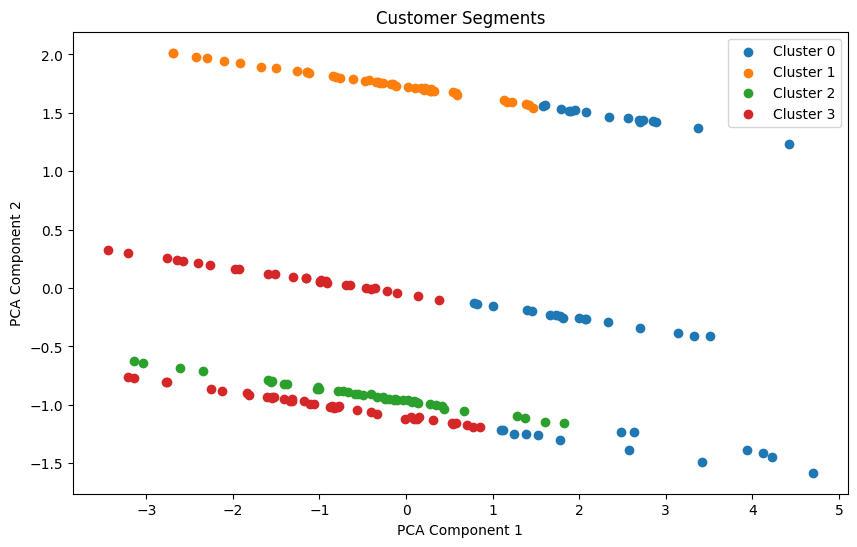

In [10]:
# Visualize clusters using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
for cluster in range(4):  # Adjust based on the number of clusters
    plt.scatter(
        reduced_features[clusters == cluster, 0],
        reduced_features[clusters == cluster, 1],
        label=f"Cluster {cluster}"
    )
plt.title("Customer Segments")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

In [11]:
# Summarize each cluster
cluster_summary = customer_data.groupby('Cluster').agg({
    'TotalValue': ['mean', 'sum'],
    'Quantity': ['mean', 'sum']
}).reset_index()
print(cluster_summary)

  Cluster   TotalValue              Quantity       
                  mean        sum       mean    sum
0       0  5893.687660  277003.32  21.000000  987.0
1       1  2867.741395  123312.88  10.651163  458.0
2       2  2890.348780  118504.30  11.292683  463.0
3       3  2480.797971  171175.06   9.115942  629.0
